<a href="https://colab.research.google.com/github/Liberatofco/Prediccionclientes/blob/main/Finalkeyquimical2_0_limpio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Objetivo del Proyecto
print("Objetivo: Desarrollar un modelo que permita predecir el riesgo de pérdida de clientes y entender por qué no compraron en el siguiente trimestre.")

# --- Carga de datos y configuración inicial ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datasets
dfranq = pd.read_excel("Franquicias_2024.xlsx")
dfpropias = pd.read_excel("Propias_2024.xlsx")

Objetivo: Desarrollar un modelo que permita predecir el riesgo de pérdida de clientes y entender por qué no compraron en el siguiente trimestre.


      Cliente  cantidad_pedidos
902       917              1161
0           1               676
54         55               666
1813     2017               452
15         16               442
11         12               429
834       848               419
2           3               405
1           2               386
496       501               369


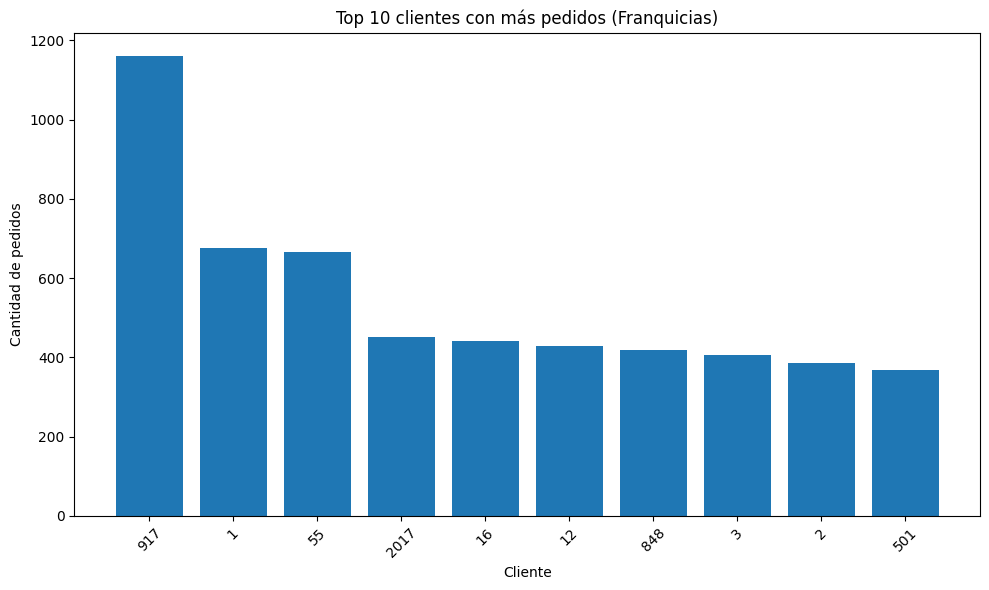

In [ ]:
# Calcular cantidad de pedidos únicos por cliente en Franquicias
pedidos_franq = dfranq.groupby('Cliente')['Factura'].nunique().reset_index(name='cantidad_pedidos')

# Mostrar top 10 clientes con más pedidos
top10_franq = pedidos_franq.sort_values(by='cantidad_pedidos', ascending=False).head(10)
print(top10_franq)

# Gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(top10_franq['Cliente'].astype(str), top10_franq['cantidad_pedidos'])
plt.title('Top 10 clientes con más pedidos (Franquicias)')
plt.xlabel('Cliente')
plt.ylabel('Cantidad de pedidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


      Cliente  cantidad_pedidos
6206   650338              1025
646      4320               670
1319    27982               598
1710    30689               559
897      9970               544
1006    17723               497
926     10529               480
1101    21030               464
6517   899928               420
1198    25185               392


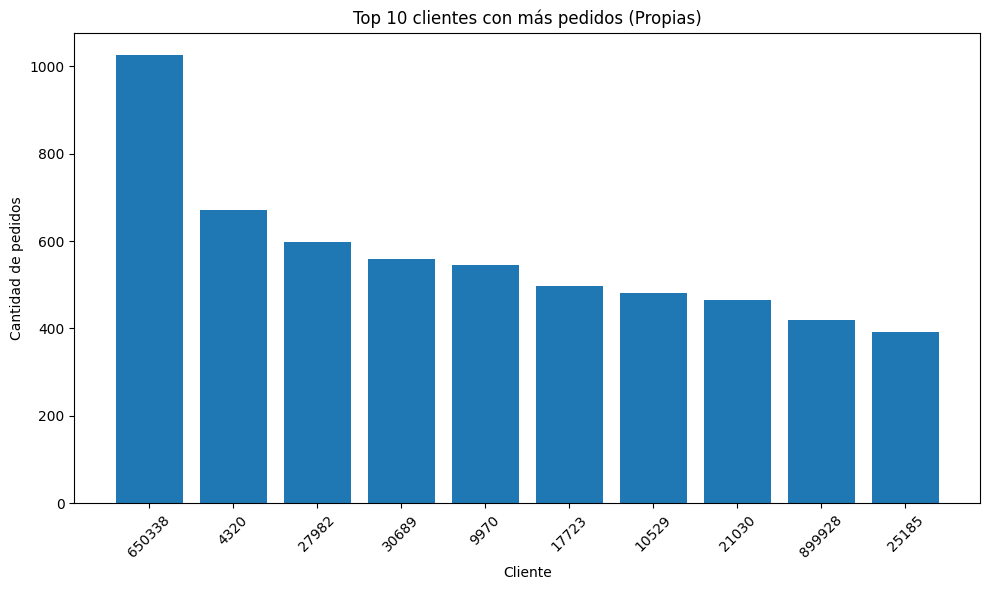

In [ ]:
# Calcular cantidad de pedidos únicos por cliente en Propias
pedidos_prop = dfpropias.groupby('Cliente')['Factura'].nunique().reset_index(name='cantidad_pedidos')

# Mostrar top 10 clientes con más pedidos
top10_prop = pedidos_prop.sort_values(by='cantidad_pedidos', ascending=False).head(10)
print(top10_prop)

# Gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(top10_prop['Cliente'].astype(str), top10_prop['cantidad_pedidos'])
plt.title('Top 10 clientes con más pedidos (Propias)')
plt.xlabel('Cliente')
plt.ylabel('Cantidad de pedidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

        Cliente  cantidad_pedidos
5747  100010196                 1
5746  100010195                 1
5761  811259437                 1
768         775                 1
773         780                 1
797         808                 1
788         798                 1
787         797                 1
820         833                 1
838         852                 1


/tmp/ipython-input-4-2486019656.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clientes_con_menos['Cliente'].astype(str), y=clientes_con_menos['cantidad_pedidos'], palette="Reds_r")


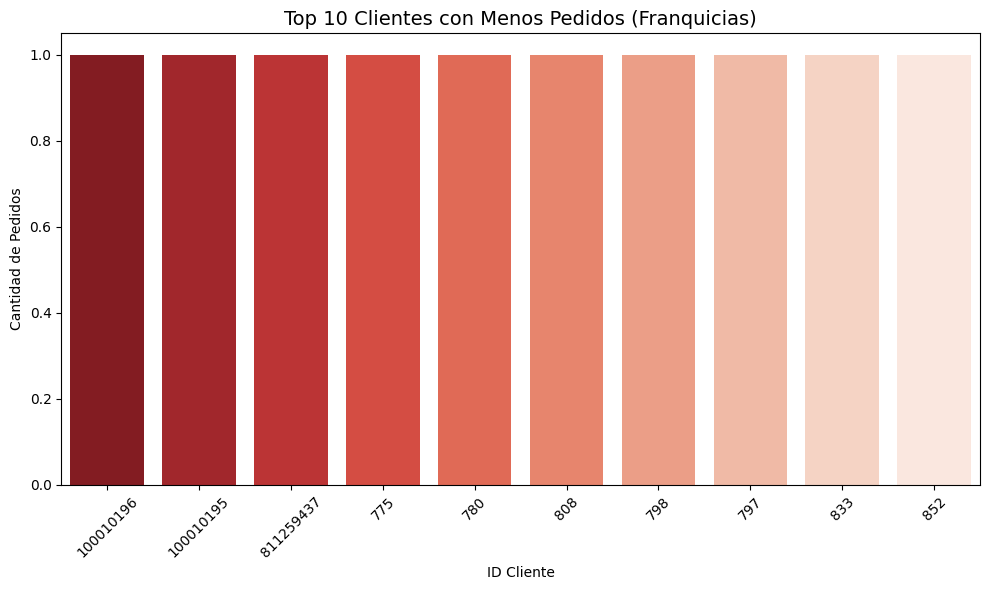

In [ ]:
# Calcular cantidad de pedidos únicos por cliente
pedidos_franq = dfranq.groupby('Cliente')['Factura'].nunique().reset_index(name='cantidad_pedidos')

# Top 10 clientes con menos pedidos (al menos uno)
clientes_con_menos = pedidos_franq[pedidos_franq['cantidad_pedidos'] > 0] \
    .sort_values(by='cantidad_pedidos', ascending=True).head(10)

# Mostrar resultados
print(clientes_con_menos)

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=clientes_con_menos['Cliente'].astype(str), y=clientes_con_menos['cantidad_pedidos'], palette="Reds_r")
plt.title('Top 10 Clientes con Menos Pedidos (Franquicias)', fontsize=14)
plt.xlabel('ID Cliente')
plt.ylabel('Cantidad de Pedidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


      Cliente  cantidad_pedidos
7452  3240320                 1
7451  3231229                 1
1067    20015                 1
7430  3220729                 1
1080    20375                 1
7405  2901024                 1
7404  2901014                 1
7403  2901009                 1
7400  2340604                 1
7483  3501243                 1


/tmp/ipython-input-5-1368251531.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clientes_con_menos_prop['Cliente'].astype(str), y=clientes_con_menos_prop['cantidad_pedidos'], palette="Purples_r")


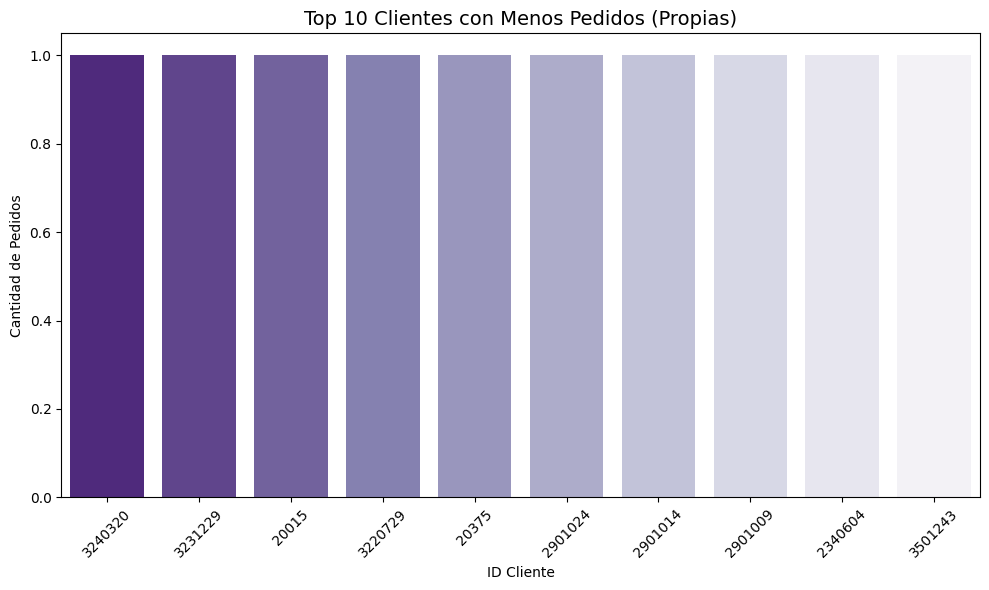

In [ ]:
# Calcular cantidad de pedidos únicos por cliente en Propias
pedidos_prop = dfpropias.groupby('Cliente')['Factura'].nunique().reset_index(name='cantidad_pedidos')

# Filtrar clientes con al menos una compra y ordenar de menor a mayor
clientes_con_menos_prop = pedidos_prop[pedidos_prop['cantidad_pedidos'] > 0] \
    .sort_values(by='cantidad_pedidos', ascending=True).head(10)

# Mostrar resultados
print(clientes_con_menos_prop)

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=clientes_con_menos_prop['Cliente'].astype(str), y=clientes_con_menos_prop['cantidad_pedidos'], palette="Purples_r")
plt.title('Top 10 Clientes con Menos Pedidos (Propias)', fontsize=14)
plt.xlabel('ID Cliente')
plt.ylabel('Cantidad de Pedidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Mes_num
Enero         34480
Febrero       34616
Marzo         36808
Abril         37499
Mayo          37922
Junio         36623
Julio         39671
Agosto        40821
Septiembre    36950
Octubre       41556
Noviembre     37559
Diciembre     36098
Name: count, dtype: int64


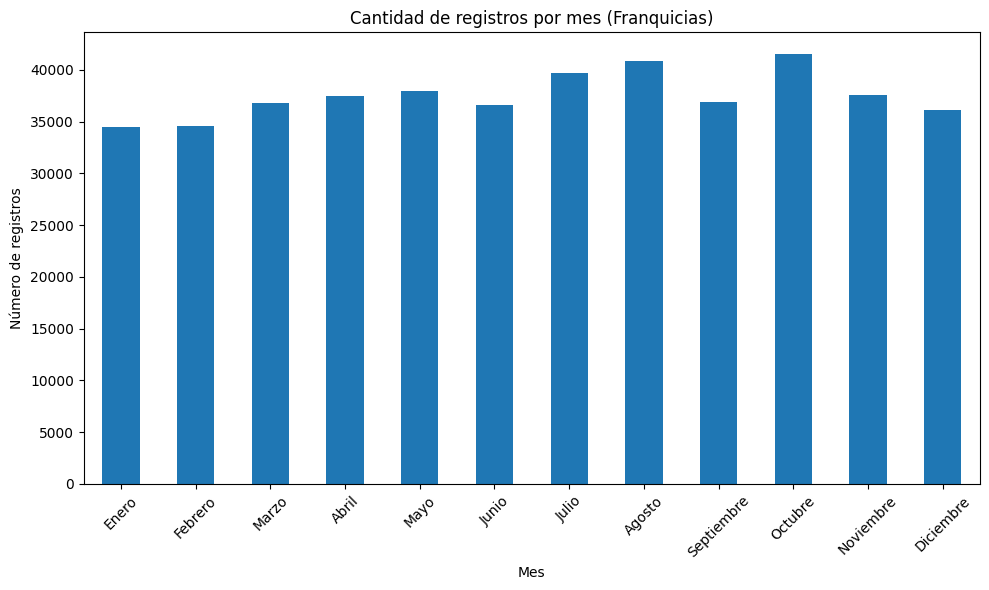

In [ ]:
# Asegurar que la columna Fecha sea datetime
dfranq['Fecha'] = pd.to_datetime(dfranq['Fecha'], errors='coerce')

# Crear columna con número de mes
dfranq['Mes_num'] = dfranq['Fecha'].dt.month

# Mapeo de número de mes a nombre
meses_order = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

# Contar registros por mes y ordenar
registros_por_mes_franq = dfranq['Mes_num'].value_counts().sort_index()
registros_por_mes_franq.index = registros_por_mes_franq.index.map(meses_order)

# Mostrar
print(registros_por_mes_franq)

# Gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
registros_por_mes_franq.plot(kind='bar')
plt.title('Cantidad de registros por mes (Franquicias)')
plt.xlabel('Mes')
plt.ylabel('Número de registros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Mes_num
Enero         48164
Febrero       48214
Marzo         47656
Abril         56762
Mayo          51604
Junio         48538
Julio         49723
Agosto        51340
Septiembre    47075
Octubre       48388
Noviembre     47395
Diciembre     42010
Name: count, dtype: int64


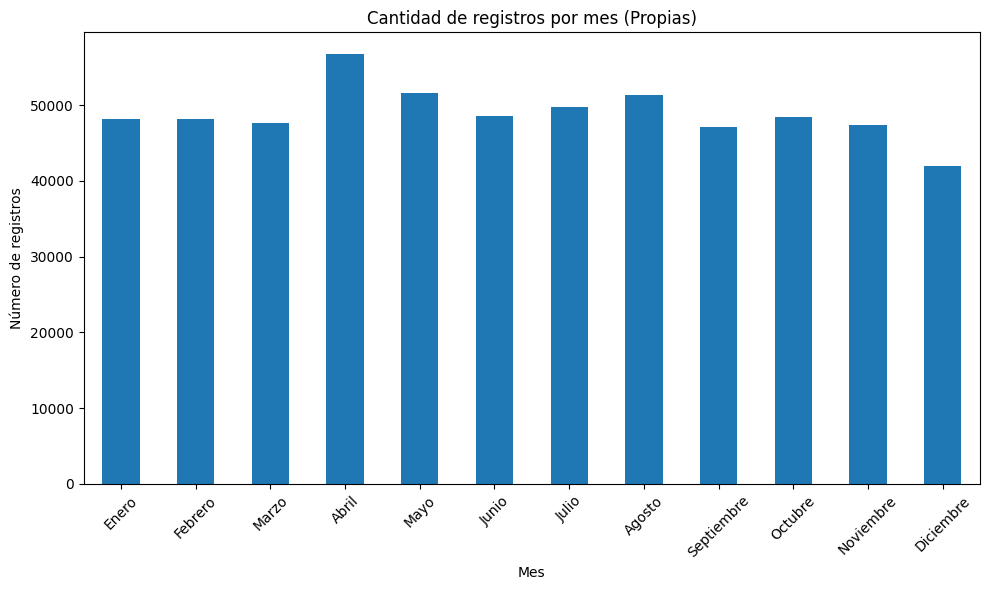

In [ ]:
# Asegurar que la columna Fecha sea datetime
dfpropias['Fecha'] = pd.to_datetime(dfpropias['Fecha'], errors='coerce')

# Crear columna con número de mes
dfpropias['Mes_num'] = dfpropias['Fecha'].dt.month

# Contar registros por mes y ordenar
registros_por_mes_prop = dfpropias['Mes_num'].value_counts().sort_index()
registros_por_mes_prop.index = registros_por_mes_prop.index.map(meses_order)

# Mostrar
print(registros_por_mes_prop)

# Gráfico
plt.figure(figsize=(10,6))
registros_por_mes_prop.plot(kind='bar')
plt.title('Cantidad de registros por mes (Propias)')
plt.xlabel('Mes')
plt.ylabel('Número de registros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 📦 LIBRERÍAS NECESARIAS
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# ✅ FUNCIÓN DE PROCESAMIENTO GENERAL
def procesar_dataset(df):
    df["Fecha"] = pd.to_datetime(df["Fecha"])
    df["Año_Trimestre"] = df["Fecha"].dt.to_period("Q")

    # Agrupamos
    df_grouped = df.groupby(["Cliente", "Año_Trimestre"]).agg({
        "Monto Precio Venta Aplicado": "sum",
        "Unidades": "sum",
        "Factura": "nunique",
        "No. Producto": "nunique"
    }).reset_index()

    df_grouped.rename(columns={
        "Monto Precio Venta Aplicado": "Total_Monto",
        "Unidades": "Total_Unidades",
        "Factura": "Num_Facturas",
        "No. Producto": "Productos_Distintos"
    }, inplace=True)

    # Crear el universo de clientes × trimestres
    clientes = df_grouped["Cliente"].unique()
    trimestres = df_grouped["Año_Trimestre"].unique()
    base_completa = pd.MultiIndex.from_product([clientes, trimestres], names=["Cliente", "Año_Trimestre"]).to_frame(index=False)

    # Merge para completar faltantes con 0
    df_completo = pd.merge(base_completa, df_grouped, how="left", on=["Cliente", "Año_Trimestre"]).fillna(0)

    # Ordenamos y generamos la variable objetivo
    df_completo = df_completo.sort_values(["Cliente", "Año_Trimestre"])
    df_completo["Compró_Siguiente_Trimestre"] = (
        df_completo.groupby("Cliente")["Total_Unidades"].shift(-1).apply(lambda x: 1 if x > 0 else 0)
    )

    return df_completo

# ✅ Aplicar procesamiento
cliente_trim_propias = procesar_dataset(dfpropias)
cliente_trim_franq = procesar_dataset(dfranq)


In [ ]:
# ✅ LIMPIAR ÚLTIMO TRIMESTRE (etiquetas incorrectas)
def limpiar_ultimo_trimestre(df):
    max_periodo = df["Año_Trimestre"].max()
    return df[df["Año_Trimestre"] < max_periodo]

cliente_trim_propias_limpio = limpiar_ultimo_trimestre(cliente_trim_propias)
cliente_trim_franq_limpio = limpiar_ultimo_trimestre(cliente_trim_franq)

In [ ]:
cliente_trim_propias_limpio["Compró_Siguiente_Trimestre"].value_counts(normalize=True)

,proportion
Compró_Siguiente_Trimestre,
1,0.772537
0,0.227463


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:42:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


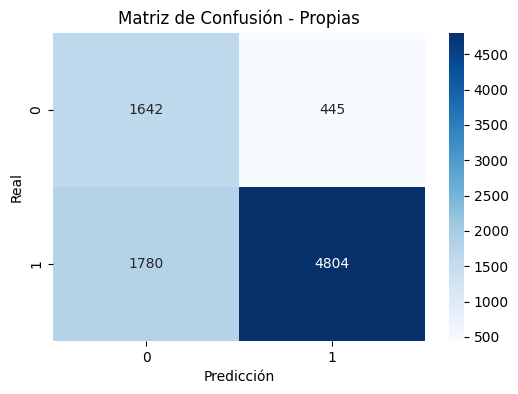


📊 Reporte de Clasificación - Propias
              precision    recall  f1-score   support

           0       0.48      0.79      0.60      2087
           1       0.92      0.73      0.81      6584

    accuracy                           0.74      8671
   macro avg       0.70      0.76      0.70      8671
weighted avg       0.81      0.74      0.76      8671



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:42:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


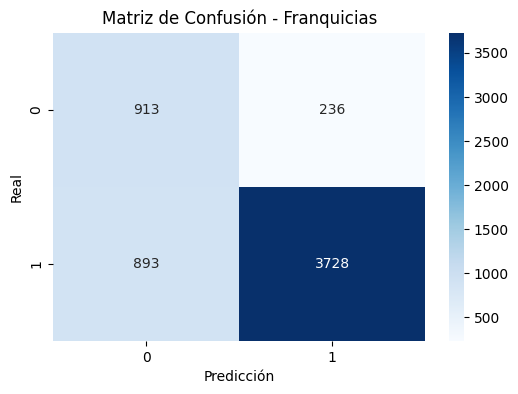


📊 Reporte de Clasificación - Franquicias
              precision    recall  f1-score   support

           0       0.51      0.79      0.62      1149
           1       0.94      0.81      0.87      4621

    accuracy                           0.80      5770
   macro avg       0.72      0.80      0.74      5770
weighted avg       0.85      0.80      0.82      5770



In [ ]:
 # ✅ FUNCIÓN GENERAL PARA ENTRENAR Y EVALUAR
def entrenar_y_evaluar_xgboost(df, nombre=""):
    # Separar últimos trimestres reales
    ultimo_periodo = df["Año_Trimestre"].max()
    train = df[df["Año_Trimestre"] < ultimo_periodo]
    test = df[df["Año_Trimestre"] == ultimo_periodo]

    X_train = train[["Total_Monto", "Total_Unidades", "Num_Facturas", "Productos_Distintos"]]
    y_train = train["Compró_Siguiente_Trimestre"]
    X_test = test[["Total_Monto", "Total_Unidades", "Num_Facturas", "Productos_Distintos"]]
    y_test = test["Compró_Siguiente_Trimestre"]

    # Balanceo
    ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

    # Modelo
    modelo = XGBClassifier(random_state=42, scale_pos_weight=ratio, use_label_encoder=False, eval_metric='logloss')
    modelo.fit(X_train, y_train)

    # Predicciones
    y_pred = modelo.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    reporte = classification_report(y_test, y_pred, output_dict=True)

    # Mostrar matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

    # Mostrar reporte
    print(f"\n📊 Reporte de Clasificación - {nombre}")
    print(classification_report(y_test, y_pred))



    return modelo  # Para usarlo después si se desea

# ✅ Entrenamiento por separado
modelo_xgb_prop = entrenar_y_evaluar_xgboost(cliente_trim_propias_limpio, "Propias")
modelo_xgb_franq = entrenar_y_evaluar_xgboost(cliente_trim_franq_limpio, "Franquicias")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# -------------------------------
# Función reutilizable
# -------------------------------
def top_10_riesgo(df, modelo, nombre_modelo):
    X = df[["Total_Monto", "Total_Unidades", "Num_Facturas", "Productos_Distintos"]]
    y = df["Compró_Siguiente_Trimestre"]
    modelo.fit(X, y)
    df["Prediccion_Recompra"] = modelo.predict(X)
    tabla = df[df["Prediccion_Recompra"] == 0]
    top_10 = tabla.groupby("Cliente").size().reset_index(name="Veces_Predicho_No_Recompra")
    top_10 = top_10.sort_values("Veces_Predicho_No_Recompra", ascending=False).head(10)
    print(f"\n🔹 TOP 10 CLIENTES EN RIESGO ({nombre_modelo})")
    print(top_10)

# --------------------------------
# Aplicar para PROPIAS
# --------------------------------
print("=== CLIENTES EN RIESGO - PROPIAS ===")

# 2. XGBoost
modelo_xgb_prop = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
top_10_riesgo(cliente_trim_propias.copy(), modelo_xgb_prop, "XGBoost - Propias")


# --------------------------------
# Aplicar para FRANQUICIAS
# --------------------------------
print("\n=== CLIENTES EN RIESGO - FRANQUICIAS ===")

# 2. XGBoost
modelo_xgb_franq = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
top_10_riesgo(cliente_trim_franq.copy(), modelo_xgb_franq, "XGBoost - Franquicias")


=== CLIENTES EN RIESGO - PROPIAS ===


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:42:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔹 TOP 10 CLIENTES EN RIESGO (XGBoost - Propias)
        Cliente  Veces_Predicho_No_Recompra
4941  999991455                           4
4942  999991456                           4
4943  999991457                           4
4945  999991461                           4
3356     598017                           4
22          372                           4
24          423                           4
26          517                           4
32          558                           4
35          586                           4

=== CLIENTES EN RIESGO - FRANQUICIAS ===


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:42:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔹 TOP 10 CLIENTES EN RIESGO (XGBoost - Franquicias)
        Cliente  Veces_Predicho_No_Recompra
3502  100010197                           4
3501  100010196                           4
3500  100010195                           4
3499  100010194                           4
3498  100010193                           4
3496  100010191                           4
3494  100010186                           4
3490  100010182                           4
3488  100010179                           4
3487  100010178                           4


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown

# Widgets
fuente_selector = widgets.Dropdown(
    options=['Propias', 'Franquicias'],
    description='Fuente:',
    style={'description_width': 'initial'}
)

cliente_input = widgets.Text(
    description='ID Cliente:',
    placeholder='Ej. 12345',
    style={'description_width': 'initial'}
)

boton_consultar = widgets.Button(
    description='Consultar predicción',
    button_style='info'
)

salida = widgets.Output()

# Función de consulta
def on_consultar_clicked(b):
    with salida:
        clear_output()
        cliente_id = cliente_input.value.strip()
        fuente = fuente_selector.value

        if cliente_id == "":
            print("⚠️ Por favor, ingresa un ID de cliente.")
            return

        # Selección de fuente y modelo
        if fuente == "Propias":
            df = cliente_trim_propias.copy()
            modelo = modelo_xgb_prop
        else:
            df = cliente_trim_franq.copy()
            modelo = modelo_xgb_franq

        if cliente_id not in df["Cliente"].astype(str).values:
            print(f"⚠️ El cliente {cliente_id} no se encuentra en los datos de {fuente}.")
            return

        # Filtrar datos del cliente
        df_cliente = df[df["Cliente"].astype(str) == cliente_id].copy()
        df_cliente = df_cliente.sort_values("Año_Trimestre")

        # Mostrar historial de compras
        display(Markdown("📄 **Trimestres donde el cliente realizó compras:**"))
        display(df_cliente[["Año_Trimestre", "Total_Monto", "Total_Unidades", "Num_Facturas", "Productos_Distintos"]])

        # Tomar el último trimestre disponible con datos
        if df_cliente.shape[0] < 2:
            print("⚠️ No hay suficientes trimestres para hacer una predicción.")
            return

        ultimo_trimestre = df_cliente["Año_Trimestre"].max()
        penultimo_trimestre = df_cliente["Año_Trimestre"].unique()[-2]  # Uno antes del último

        # Filtrar el trimestre base para la predicción
        base_prediccion = df_cliente[df_cliente["Año_Trimestre"] == penultimo_trimestre]

        if base_prediccion.empty:
            print("⚠️ No se encontró información válida para hacer la predicción.")
            return

        # Realizar predicción
        X_pred = base_prediccion[["Total_Monto", "Total_Unidades", "Num_Facturas", "Productos_Distintos"]]
        pred = modelo.predict(X_pred)[0]

        # Mostrar predicción
        display(Markdown(f"🔮 **Predicción para el trimestre siguiente a `{penultimo_trimestre}`:**"))
        if pred == 1:
            display(Markdown("👉 ✅ **Sí comprará**"))
        else:
            display(Markdown("👉 ❌ **No comprará**"))

# Conectar evento
boton_consultar.on_click(on_consultar_clicked)

# Mostrar widgets
display(fuente_selector, cliente_input, boton_consultar, salida)

Dropdown(description='Fuente:', options=('Propias', 'Franquicias'), style=DescriptionStyle(description_width='…

Text(value='', description='ID Cliente:', placeholder='Ej. 12345', style=DescriptionStyle(description_width='i…

Button(button_style='info', description='Consultar predicción', style=ButtonStyle())

Output()